In [1]:
import igraph as ig
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import tweets_as_dataframe
from src.crud import get_author_to_author, get_distinct_authors
from src.config import get_db_connection

In [2]:
con = get_db_connection(db_path="../../../data/twitter.db", use_dict_reponses=False)
retweet_edges = get_author_to_author(con, response_type="retweeted")
reply_edges = get_author_to_author(con, response_type="replied_to")
con.close()
con = get_db_connection(db_path="../../../data/twitter.db")
authors = get_distinct_authors(con)
con.close()
print(f"num vertices: {len(authors)}")
print(reply_edges[:3])
pd.DataFrame(retweet_edges).head()

num vertices: 481467
[('307001802', '41077970'), ('786625296', '338985020'), ('2431501916', '16717501')]


,0,1
0,1011975294,1471250628
1,255144027,313743136
2,214748274,4010449719
3,449273927,3114313702
4,1601937732,3310347050


In [3]:
retweet_graph = ig.Graph(len(authors))
retweet_graph["title"] = "Retweet network"
retweet_graph.vs["name"] = authors
retweet_graph.add_edges(retweet_edges)

KeyboardInterrupt: 

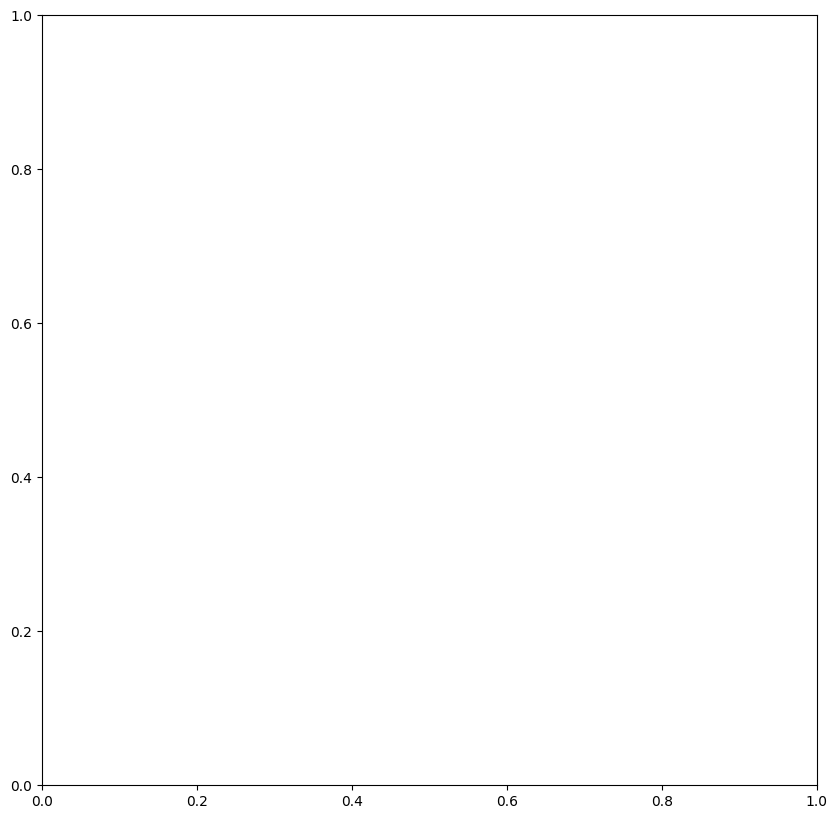

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ig.plot(
    retweet_graph,
    target=ax,
    # layout="circle", # print nodes in a circular layout
    vertex_size=30,
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label_size=7.0,
)

plt.show()

In [4]:
reply_graph = ig.Graph(len(authors))
reply_graph["title"] = "reply network"
reply_graph.vs["name"] = authors
reply_graph.add_edges(reply_edges)

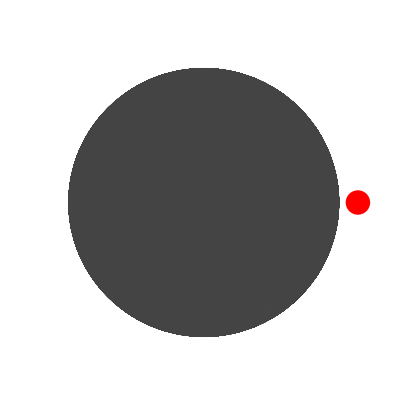

In [5]:
fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    reply_graph,
    target=ax,
    layout="circle", # print nodes in a circular layout
    vertex_size=30,
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label_size=7.0,
)

plt.show()